<a href="https://colab.research.google.com/github/ultra151/cv/blob/main/16_OpenCV_%EC%96%BC%EA%B5%B4%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/pytest_img/opencv

/content/gdrive/MyDrive/pytest_img/opencv


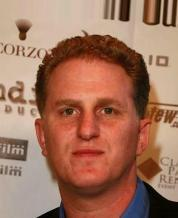

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/gdrive/MyDrive/pytest_img/img_align_celeba_small/202485.jpg')
cv2_imshow(img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

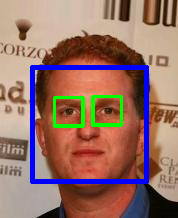

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(image=gray, scaleFactor=1.2, minNeighbors=1)

for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2_imshow(img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


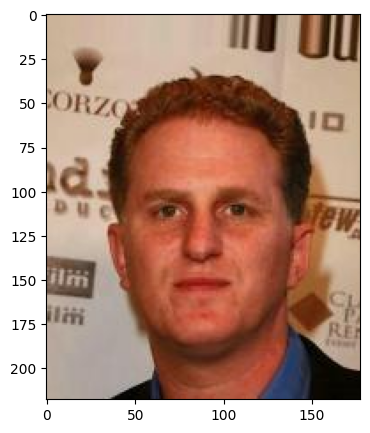

In [ ]:
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

img_path = '/content/gdrive/MyDrive/pytest_img/img_align_celeba_small/202485.jpg'

sp = dlib.shape_predictor('/content/gdrive/MyDrive/pytest_img//dlib/shape_predictor_5_face_landmarks.dat')
detector = dlib.get_frontal_face_detector()

img = dlib.load_rgb_image(img_path)
plt.figure(figsize=(8,5))
plt.imshow(img)

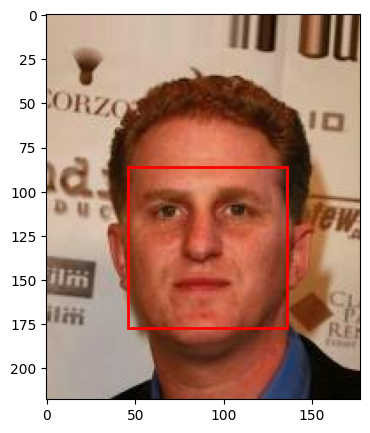

In [ ]:
dets = detector(img, 1)
if len(dets) == 0:
    print('cannot find faces!')

fig, ax = plt.subplots(1, figsize=(8,5))
for det in dets:
    x, y, w, h = det.left(), det.top(), det.width(), det.height()
    rect = patches.Rectangle((x,y), w, h, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
ax.imshow(img)

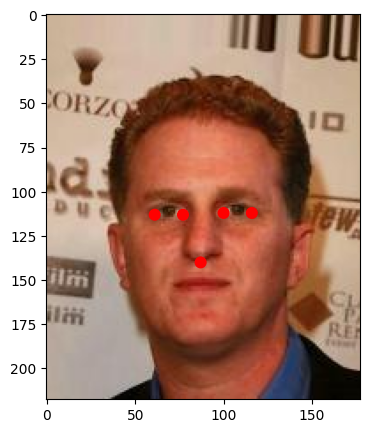

In [ ]:
fig, ax = plt.subplots(1, figsize=(8,5))
for det in dets:
    s = sp(img, det)
    for point in s.parts():
        circle = patches.Circle((point.x, point.y), radius=3, edgecolor='r', facecolor='r')
        ax.add_patch(circle)
ax.imshow(img)

In [ ]:
RIGHT_EYE = list(range(36, 42))
LEFT_EYE = list(range(42, 48))
EYES = list(range(36, 48))
MOUTH = list(range(48, 68))
NOSE = list(range(27, 36))
EYEBROWS = list(range(17, 27))
JAWLINE = list(range(0, 17))
ALL = list(range(0, 68))

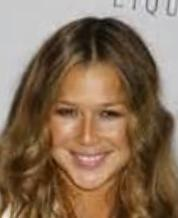

In [ ]:
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

img_path = '/content/gdrive/MyDrive/pytest_img/img_align_celeba_small/202542.jpg'

sp = dlib.shape_predictor('/content/gdrive/MyDrive/pytest_img//dlib/shape_predictor_68_face_landmarks.dat')
detector = dlib.get_frontal_face_detector()

img = dlib.load_rgb_image(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2_imshow(img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [ ]:
img_result = img.copy()
img_resize = cv2.resize(img_result, dsize=(350,450))
gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
dets = detector(gray,1)
if len(dets) == 0:
    print('발견된 얼굴이 없습니다!')
print("발견된 얼굴의 수:", len(dets))

발견된 얼굴의 수: 1


In [ ]:
import numpy as np

for det in dets:
    points = np.array([[p.x,p.y] for p in sp(gray, det).parts()])
    show_parts = points[ALL]

    for (i,point) in enumerate(show_parts):
        x = point[0]
        y = point[1]
        cv2.circle(img_resize,(x,y), 1, (0, 0, 255), -1)
        cv2.putText(img_resize, f"{i+1}", (x,y-2), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1,)

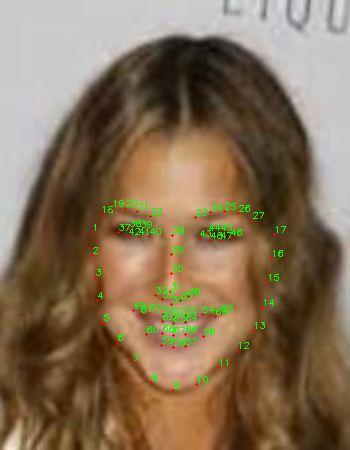

In [ ]:
cv2_imshow(img_resize)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [ ]:
def eye_aspect_ratio(eye_points):
    A = np.linalg.norm(eye_points[1] - eye_points[5])
    B = np.linalg.norm(eye_points[2] - eye_points[4])
    C = np.linalg.norm(eye_points[0] - eye_points[3])
    EAR = (A + B) / (2.0 * C)
    return EAR

In [ ]:
for det in dets:
    points = np.array([[p.x, p.y] for p in sp(gray, det).parts()])
    left_eye_EAR = eye_aspect_ratio(points[LEFT_EYE])
    right_eye_EAR = eye_aspect_ratio(points[RIGHT_EYE])
    if left_eye_EAR < 0.25:
        print("왼쪽 눈을 감고 있음")
    else:
        print("왼쪽 눈을 뜨고 있음")
    if right_eye_EAR < 0.25:
        print("오른쪽 눈을 감고 있음")
    else:
        print("오른쪽 눈을 뜨고 있음")

왼쪽 눈을 뜨고 있음
오른쪽 눈을 감고 있음


In [ ]:
img_result = img.copy()
img_resize = cv2.resize(img_result, dsize=(350,450))

gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
dets = detector(gray, 1)

if len(dets) == 0:
    print("발견된 얼굴이 없습니다!")
print("발견된 얼굴의 수:", len(dets))

발견된 얼굴의 수: 1


In [ ]:
for det in dets:
    points = np.array([[p.x, p.y] for p in sp(gray, det).parts()])
    left_eye_stat = 'open'
    right_eye_stat = 'open'

    left_eye_EAR = eye_aspect_ratio(points[LEFT_EYE])
    right_eye_EAR = eye_aspect_ratio(points[RIGHT_EYE])

    if left_eye_EAR < 0.25:
        left_eye_stat = 'close'
    if right_eye_EAR < 0.25:
        right_eye_stat = 'close'

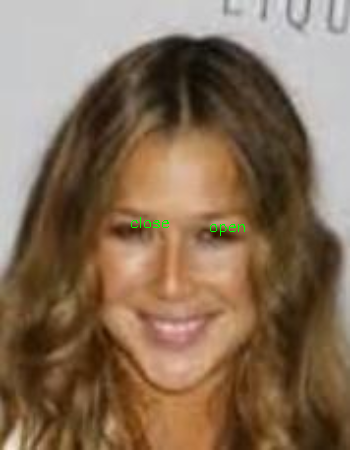

In [ ]:
cv2.putText(img_resize, left_eye_stat, (points[LEFT_EYE][1][0], points[LEFT_EYE][1][1]-1),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(0, 255, 0), thickness=1)

cv2.putText(img_resize, right_eye_stat, (points[RIGHT_EYE][1][0], points[RIGHT_EYE][1][1]-1),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(0, 255, 0), thickness=1)

cv2_imshow(img_resize)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [ ]:
def mouth_aspect_ratio(mouth_points):
    top = mouth_points[3]
    bottom = mouth_points[9]
    left = mouth_points[0]
    right = mouth_points[6]
    MAR = np.linalg.norm(top - bottom) / np.linalg.norm(left - right)
    return MAR

In [ ]:
for det in dets:
    points = np.array([[p.x, p.y] for p in sp(gray, det).parts()])
    mar = mouth_aspect_ratio(points[MOUTH])

    if mar > 0.35:
        print("입을 벌리고 있음")
    else:
        print("입을 다물고 있음")

입을 벌리고 있음


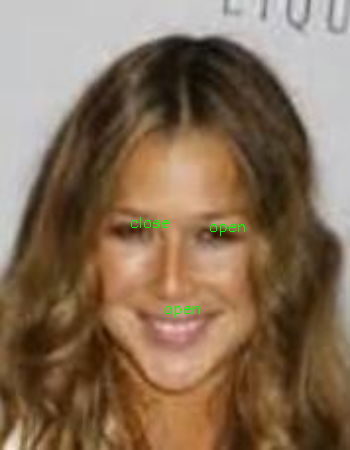

In [ ]:
for det in dets:
    points = np.array([[p.x, p.y] for p in sp(gray, det).parts()])
    mar = mouth_aspect_ratio(points[MOUTH])
    mouth_stat = 'close'
    if mar > 0.35:
        mouth_stat = 'open'

    cv2.putText(img_resize, mouth_stat, (points[MOUTH][2][0], points[MOUTH][2][1]-1),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(0,255,0), thickness=1)
cv2_imshow(img_resize)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [ ]:
img_path = '/content/gdrive/MyDrive/pytest_img/img_align_celeba_small/202509.jpg'

In [ ]:
import dlib
import cv2
age_list = ['(0-2)','(4-6)','(8-12)','(15-20)','(25-32)','(38-43)','(48-53)','(60-100)']
gender_list = ['Male','Female']

In [ ]:
detector = dlib.get_frontal_face_detector()
age_detector = cv2.dnn.readNetFromCaffe("/content/gdrive/MyDrive/pytest_img/dlib/deploy_age.prototxt",
                                        "/content/gdrive/MyDrive/pytest_img/dlib/age_net.caffemodel")

gender_detector = cv2.dnn.readNetFromCaffe("/content/gdrive/MyDrive/pytest_img/dlib/deploy_gender.prototxt",
                                          "/content/gdrive/MyDrive/pytest_img/dlib/gender_net.caffemodel")

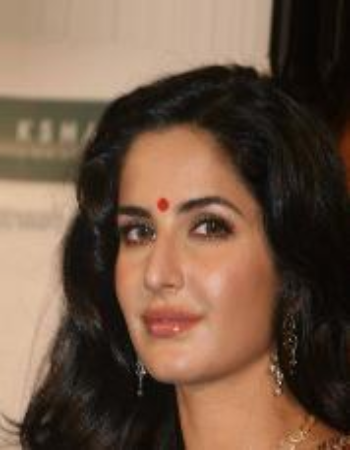

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/gdrive/MyDrive/pytest_img/img_align_celeba_small/202572.jpg')
img_resize = cv2.resize(img, dsize=(350,450))

cv2_imshow(img_resize)
#cv2.waitKey(0)
#cv2.destroyAllWindows

In [ ]:
gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
dets = detector(gray, 1)
if len(dets) == 0:
    print("발견된 얼굴이 없습니다!")
print("발견된 얼굴의 수:", len(dets))

발견된 얼굴의 수: 1


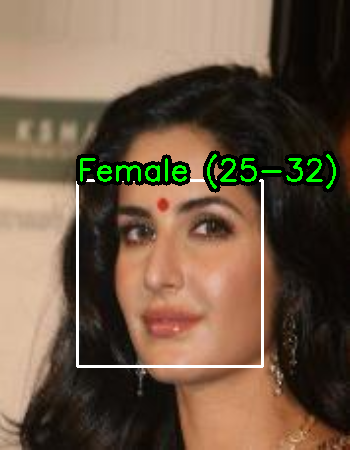

In [ ]:
for det in dets:
    x1,y1,x2,y2 = det.left(), det.top(), det.right(), det.bottom()
    face_img = img_resize[y1:y2, x1:x2].copy()
    blob = cv2.dnn.blobFromImage(face_img, scalefactor=1, size=(227,227),
                                 mean=(78.4263377603,87.7689143744,114.895847746),swapRB=False)
    age_detector.setInput(blob)
    age_preds = age_detector.forward()
    age = age_list[age_preds[0].argmax()]

    gender_detector.setInput(blob)
    gender_preds = gender_detector.forward()
    gender = gender_list[gender_preds[0].argmax()]
    cv2.rectangle(img_resize, (x1,y1),(x2,y2),(255,255,255),2)
    text = f'{gender} {age}'
    cv2.putText(img_resize,text, (x1,y1), fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1, color=(0,0,0), thickness=10)
    cv2.putText(img_resize,text, (x1,y1), fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1, color=(0,255,0), thickness=2)
    cv2_imshow(img_resize)

